In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
colors = sns.color_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

**Mô tả tập dữ liệu:**

Tập dữ liệu Data_Practice.xlsx chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân.
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)
---

In [1]:
# Hiển thị thông tin biến
df_practice = pd.read_excel('data/Data_Practice.xlsx')
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [2]:
# Hiển thị 5 dòng dữ liệu đầu tiên
df_practice.head()

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1


In [3]:
df_practice.describe()

,Age,Target
count,956.000000,961.000000
mean,56.306485,0.463059
std,30.044212,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,870.000000,1.000000


Ta thấy ở Age có độ tuổi 870 (vô lý) nên ta sẽ phải xử lý nó.

In [4]:
df_practice.loc[df_practice['Age'] == 870, 'Age'] = 87

In [5]:
df_practice.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [6]:
df_practice.describe(include='O')

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,5,6,5
top,P1,Irregular,Circumscribed,Low
freq,1,399,357,797


### 1.Thuộc tính Age - Target
---

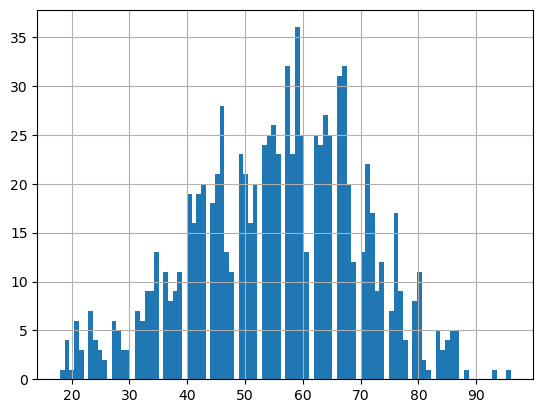

In [7]:
plt.hist(df_practice.Age,bins=96)
plt.grid(True)
plt.show()

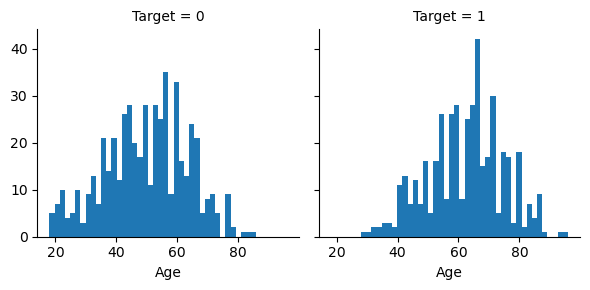

In [8]:
#Thống kê liệu tuổi hành khách u lành|ác tính theo tuổi
g = sns.FacetGrid(df_practice, col='Target')
g.map(plt.hist, 'Age', bins=40, )
plt.show()

**Sau khi kiểm tra, ta thấy :**
- Độ tuổi từ **18 - 40** tuổi tỉ lệ mắc u ác tính rất thấp gần như là ko có.
- Độ tuổi từ **40 - 58** tuổi tỉ lệ mắc u ác tính bắt đầu tăng cao dần.
- Độ tuổi từ **58** tuổi trở đi tỉ lệ u ác tính tăng cao nhiều.


### 2.Thuộc tính Shape - Target
---

In [14]:
sl_Shape = df_practice['Shape'].value_counts()
sl_Shape

Shape
Irregular    400
Round        224
Oval         211
Lobular       95
Name: count, dtype: int64

Ta thấy ở thuộc tính Shape có 1 chỉ số 'IRREGULAR' trùng với tên 1 chỉ số nhưng bị viết hoa hết nên ta sẽ thay đổi nó.

In [15]:
df_practice.loc[(df_practice['Shape']=='IRREGULAR'), 'Shape'] = 'Irregular'

In [16]:
sl_Shape_02 = df_practice['Shape'].value_counts()
sl_Shape_02

Shape
Irregular    400
Round        224
Oval         211
Lobular       95
Name: count, dtype: int64

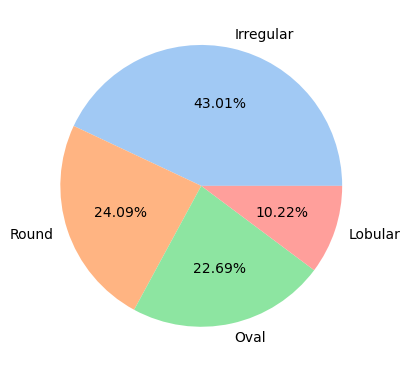

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(sl_Shape_02.values, labels=['Irregular','Round','Oval','Lobular'],
       autopct='%.2f%%',
       colors=colors)
plt.show()

In [18]:
df_practice[['Shape', 'Target']].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


**Sau khi kiểm tra, ta thấy :**
- Chỉ số 'Irregular' xuất hiện nhiều nhất, bên cạnh ấy ảnh hưởng tới khả năng bị u ác tính rất cao lên tới 78%.
- Chỉ số 'Lobular' xuất hiện ít nhất nhưng lại có tỉ lệ u ác tính tương đối cao lên tới gần 50%.

### 3.Thuộc tính Margin - Target
---

In [19]:
sl_Margin = df_practice['Margin'].value_counts()
sl_Margin

Margin
Circumscribed     357
ill-defined       280
Spiculated        135
Obscured          116
Microlobulated     24
SPICULATED          1
Name: count, dtype: int64

Ta thấy ở thuộc tính Margin có 1 chỉ số 'SPICULATED' trùng với tên 1 chỉ số nhưng bị viết hoa hết nên ta sẽ thay đổi nó.

In [20]:
df_practice.loc[(df_practice['Margin']=='SPICULATED'), 'Margin'] = 'Spiculated'

In [21]:
sl_Margin_02 = df_practice['Margin'].value_counts()
sl_Margin_02

Margin
Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: count, dtype: int64

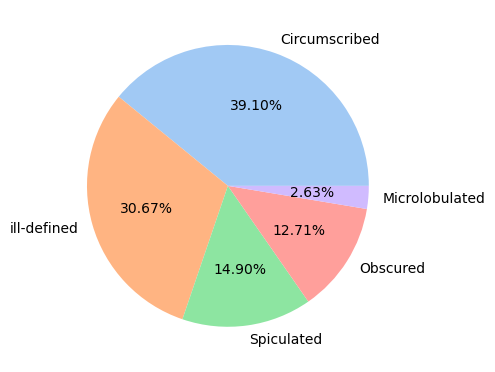

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.pie(sl_Margin_02.values, labels=['Circumscribed','ill-defined','Spiculated','Obscured','Microlobulated'],
       autopct='%.2f%%',
       colors=colors)
plt.show()

In [23]:
tl_Margin = df_practice[['Margin', 'Target']].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)
tl_Margin

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


**Sau khi kiểm tra, ta thấy rằng:** 
- Chỉ số 'Spiculated' tỉ lệ u ác tính rất cao.
- Chỉ số 'ill-defined' số lượng nhiều và có tỉ lệ u ác tính cao.
- Chỉ số 'Obscured' số lượng ít có tỉ lệ u ác tính khá cao.
- Chỉ số 'Microlobulated' số lượng rất ít nhưng tỉ lệ u ác tính khá cao.
- Chỉ số 'Circumscribed' số lượng nhiều nhưng tỉ lệ u ác tính rất thấp.

### 4.Thuộc tính Density - Target
---

In [24]:
sl_Density = df_practice['Density'].value_counts()
sl_Density

Density
Low               797
Iso                59
High               16
Fat-containing     12
LOW                 1
Name: count, dtype: int64

Ta thấy ở thuộc tính Density có 1 chỉ số 'LOW' trùng với tên 1 chỉ số nhưng bị viết hoa hết nên ta sẽ thay đổi nó.

In [25]:
df_practice.loc[(df_practice['Density']=='LOW'), 'Density'] = 'Low'

In [26]:
sl_Density_02 = df_practice['Density'].value_counts()
sl_Density_02

Density
Low               798
Iso                59
High               16
Fat-containing     12
Name: count, dtype: int64

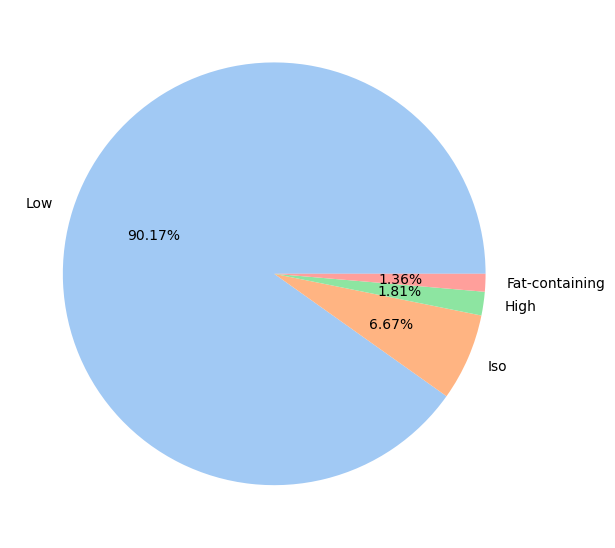

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,2)
plt.pie(sl_Density_02.values, labels=['Low','Iso','High','Fat-containing'],
       autopct='%.2f%%',
       colors=colors)
plt.show()

In [28]:
df_practice[['Density', 'Target']].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


**Sau khi kiểm tra, ta thấy :** 
- Chỉ số 'Low' thì tỉ lệ mắc u ác tính cũng gần nửa số bệnh nhân.
- Chỉ số 'High', 'Fat-containing' số lượng ít nhưng tỉ lệ u ác tính khá cao.
- Chỉ số 'Iso' số lượng ít và tỉ lệ u ác tính cũng khá thấp.

## XỬ LÝ DỮ LIỆU MISSING
---

In [29]:
# Loại bỏ thuộc tính không quan trọng
df_data = df_practice.drop(['PatientID'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


In [30]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

In [31]:
missing_values(df_data)

File dữ liệu bao gồm có: 5 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


### 1. Xử lí thuộc tính 'Age'
---

In [32]:
# Các bản ghi missing của "Age"
df_data.loc[df_data[['Age']].isnull().any(axis=1)].reset_index(drop=True)

,Age,Shape,Margin,Density,Target
0,NaN,Irregular,Spiculated,Low,1
1,NaN,Irregular,ill-defined,Low,1
2,NaN,Lobular,Obscured,Low,1
3,NaN,Irregular,ill-defined,Low,1
4,NaN,Irregular,Obscured,Low,1


In [33]:
age_count = df_data[df_data['Target']==1]['Age'].value_counts().nlargest(5)
age_count

Age
67.0    23
71.0    19
66.0    19
59.0    17
65.0    16
Name: count, dtype: int64

- Vì 5 bệnh nhân này đều mắc u ác tính mà dữ liệu trên ta phân tích và bảng thống kê ==> 67 tuổi có tỉ lệ mắc u ác tính cao nhất.

**Thực hiện**
- Ta sẽ thay các giá trị 'null' thành '67' tuổi

In [34]:
df_data['Age'].fillna(67, inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      961 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


### 2. Xử lí thuộc tính 'Shape'
---

In [35]:
# Hiển thị dữ liệu missing của Shape
df_data[df_data[['Shape']].isnull().any(axis=1)].sort_values(by='Age').reset_index(drop=True)

,Age,Shape,Margin,Density,Target
0,34.0,NaN,NaN,Fat-containing,0
1,40.0,NaN,Obscured,Fat-containing,1
2,41.0,NaN,NaN,Low,0
3,42.0,NaN,NaN,Fat-containing,0
4,44.0,NaN,ill-defined,Low,0
5,46.0,NaN,Spiculated,NaN,1
6,48.0,NaN,ill-defined,NaN,1
7,49.0,NaN,Obscured,Low,0
8,50.0,NaN,NaN,Low,1
9,51.0,NaN,NaN,Low,0


In [36]:
Shape_count_00 = df_data[df_data['Target']==0]['Shape'].value_counts()
Shape_count_00

Shape
Round        186
Oval         176
Irregular     85
Lobular       50
Name: count, dtype: int64

- Ta thấy rằng Target = 0 thì có 'Round' và 'Oval' là chiếm nhiều nhất nên ta sẽ phải chia làm 2 nhóm.

In [37]:
Shape_count_01 = df_data[df_data['Target']==1]['Shape'].value_counts()
Shape_count_01

Shape
Irregular    315
Lobular       45
Round         38
Oval          35
Name: count, dtype: int64

- Ta thấy rằng Target = 1 thì có 'Irregular' là chiếm nhiều nhất nên ta sẽ thay thế 'null' thành 'Irregular'

In [38]:
# Lọc Target = 0 có 'Round' và 'Oval' 
df_Shape_00 = df_data[(df_data['Target']==0) & ((df_data['Shape']== 'Round') | (df_data['Shape']== 'Oval'))]

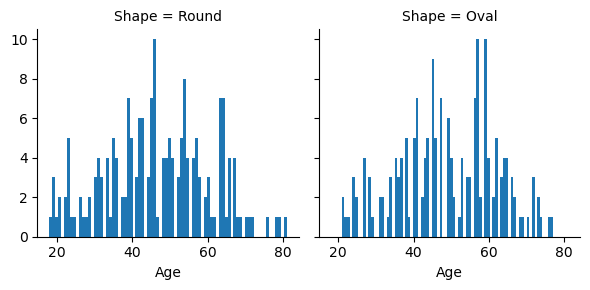

In [39]:
g = sns.FacetGrid(df_Shape_00, col='Shape')
g.map(plt.hist, 'Age', bins=80,)
plt.show()

In [40]:
Oval_count = df_Shape_00[df_Shape_00['Shape']=='Oval']['Age'].value_counts().nlargest(7)
Oval_count

Age
59.0    10
57.0    10
45.0     9
47.0     7
41.0     7
56.0     7
49.0     6
Name: count, dtype: int64

- Ta thấy từ 56 tuổi trở đi là Oval tăng cao

**Thực hiện**
- Thuộc tính 'Shape' có giá trị null từ độ tuổi 34 - 82
- Ở thuộc tính 'Target' = 1, ta sẽ thay thế 'Shape' = 'Irregular' vì có số lượng cao hơn hẳn so với 3 chỉ số còn lại
- Ở thuộc tính 'Target' = 0, ta sẽ chia làm 2 nhóm cụ thể vì chiếm đa số:
    - Nhóm 1 : Shape = Round (độ tuổi từ 34 - 55)
    - Nhóm 2 : Shape = Oval (độ tuổi từ 56 - 82)

In [41]:
# Xử lý missing ở Target = 1
df_data.loc[(df_data['Target']==1) & (df_data['Shape'].isnull()), 'Shape'] = 'Irregular'

In [42]:
# Xử lý missing ở Target = 0
df_data.loc[(df_data['Target']==0) & (df_data['Shape'].isnull()) & (df_data['Age'] >= 34) & (df_data['Age'] <=55),
            'Shape'] = 'Round'

df_data.loc[(df_data['Target']==0) & (df_data['Shape'].isnull()) & (df_data['Age'] >= 56) & (df_data['Age'] <=82),
            'Shape'] = 'Oval'

In [43]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      961 non-null    float64
 1   Shape    961 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


### 3. Xử lí thuộc tính 'Margin'
---

In [44]:
df_data[df_data[['Margin']].isnull().any(axis=1)].reset_index(drop=True)

,Age,Shape,Margin,Density,Target
0,65.0,Round,NaN,Low,0
1,70.0,Oval,NaN,Low,0
2,42.0,Round,NaN,Low,0
3,64.0,Round,NaN,Low,0
4,40.0,Round,NaN,NaN,0
5,66.0,Irregular,NaN,High,1
6,43.0,Round,NaN,NaN,0
7,63.0,Lobular,NaN,Low,0
8,77.0,Lobular,NaN,NaN,0
9,42.0,Round,NaN,Fat-containing,0


In [45]:
Margin_count_00 = df_data[df_data['Target']==0]['Margin'].value_counts()
Margin_count_00

Margin
Circumscribed     316
ill-defined        89
Obscured           43
Spiculated         22
Microlobulated      9
Name: count, dtype: int64

In [46]:
Margin_count_01 = df_data[df_data['Target']==1]['Margin'].value_counts()
Margin_count_01

Margin
ill-defined       191
Spiculated        114
Obscured           73
Circumscribed      41
Microlobulated     15
Name: count, dtype: int64

In [47]:
# Hiển thị tỉ lệ Target ở Margin
tl_Margin

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


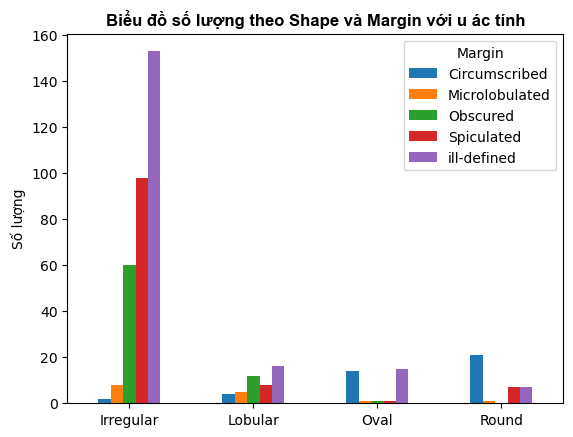

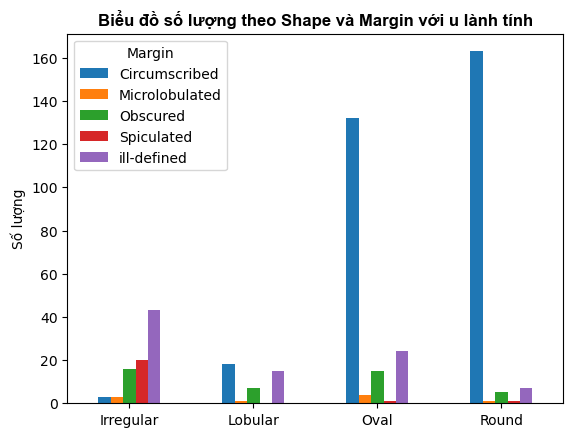

In [49]:
df_target_01 = df_data[df_data['Target']==1]

count_data = df_target_01.groupby(['Shape', 'Margin']).size().unstack(fill_value=0)
count_data.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng theo Shape và Margin với u ác tính',
          fontdict={'fontname':'Arial',
         'fontweight':'bold',
         'fontsize':12})

plt.show()

#--------------------------------------------------------------------------------------------------------------------#
df_target_00 = df_data[df_data['Target']==0]

count_data = df_target_00.groupby(['Shape', 'Margin']).size().unstack(fill_value=0)
count_data.plot(kind='bar')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng theo Shape và Margin với u lành tính',
         fontdict={'fontname':'Arial',
         'fontweight':'bold',
         'fontsize':12})

plt.show()

**Thực hiện**  
---
- **U lành tính (Target = 0)**
    - **Nhóm 0.1** : (Irregular) vì ill-defined số lượng cao nhất và tỉ lệ mắc u ác tính đỡ hơn so với các chỉ số còn lại  
    => Thay Null thành ill-defined
    - **Nhóm 0.2** : (Lobular + Oval + Round) vì Circumscribed số lượng cao nhất và tỉ lệ mắc u ác tính rất thấp  
    => Thay Null thành Circumscribed
   
- **U ác tính (Target = 1)**
    - **Nhóm 1.1** : (Irregular) vì Spiculated số lượng cũng khá nhiều so với ill-defined nhưng lại có tỉ lệ mắc u ác tính cao hơn nhiều  
    => Thay Null thành Spiculated
    - **Nhóm 1.2** : (Lobular) vì Obscured số lượng cũng khá nhiều so với ill-defined nhưng lại có tỉ lệ mắc u ác tính cao hơn nhiều  
    => Thay Null thành Obscured
    - **Nhóm 1.3** : (Oval) vì ill-defined số lượng nhiều nhất và tỉ lệ mắc u ác tính cao rất nhiều so với Circumscribed
    => Thay Null thành ill-defined
    - **Nhóm 1.4** : (Round) vì Spiculated mặc dù số lượng thấp hơn nhưng tỉ lệ mắc u ác tính rất cao
    => Thay Null thành Spiculated

In [50]:
# Nhóm 0.1
df_data.loc[(df_data['Target']==0) & (df_data['Shape']=='Irregular'), 'Margin'] = 'ill-defined'
# Nhóm 0.2
df_data.loc[(df_data['Target']==0) & ((df_data['Shape']=='Lobular') | (df_data['Shape']=='Oval') | (df_data['Shape']=='Round')), 'Margin'] = 'Circumscribed'
# Nhóm 1.1
df_data.loc[(df_data['Target']==1) & (df_data['Shape']=='Irregular'), 'Margin'] = 'Spiculated'
# Nhóm 1.2
df_data.loc[(df_data['Target']==1) & (df_data['Shape']=='Lobular'), 'Margin'] = 'Obscured'
# Nhóm 1.3
df_data.loc[(df_data['Target']==1) & (df_data['Shape']=='Oval'), 'Margin'] = 'ill-defined'
# Nhóm 1.4
df_data.loc[(df_data['Target']==1) & (df_data['Shape']=='Round'), 'Margin'] = 'Spiculated'

In [51]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      961 non-null    float64
 1   Shape    961 non-null    object 
 2   Margin   961 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


### 4. Xử lí thuộc tính 'Density'
---

In [52]:
df_data[df_data[['Density']].isnull().any(axis=1)].reset_index(drop=True)

,Age,Shape,Margin,Density,Target
0,43.0,Round,Spiculated,NaN,1
1,74.0,Round,Spiculated,NaN,1
2,40.0,Round,Circumscribed,NaN,0
3,43.0,Round,Circumscribed,NaN,0
4,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...
71,46.0,Irregular,Spiculated,NaN,1
72,57.0,Oval,Circumscribed,NaN,0
73,27.0,Oval,Circumscribed,NaN,0
74,57.0,Irregular,Spiculated,NaN,1


**Thực hiện**
- Vì chỉ số 'Low' chiếm tới 90% nên ta sẽ thấy hết các Null thành 'Low'

In [53]:
df_data.loc[df_data['Density'].isnull(), 'Density'] = 'Low'
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      961 non-null    float64
 1   Shape    961 non-null    object 
 2   Margin   961 non-null    object 
 3   Density  961 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


# RỜI RẠC HOÁ DỮ LIỆU

## 1. Chuyển Age
---

In [54]:
df_temp = df_data.copy()
df_temp['AgeBand'] = pd.cut(df_temp['Age'], 6)

df_temp[['AgeBand', 'Target']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Target
0,"(17.922, 31.0]",0.036364
1,"(31.0, 44.0]",0.255952
2,"(44.0, 57.0]",0.360424
3,"(57.0, 70.0]",0.585209
4,"(70.0, 83.0]",0.790323
5,"(83.0, 96.0]",0.900000


**Ta thấy rằng, tỷ lệ mắc u vú ác tính có quan hệ theo độ tuổi, người già có tỷ lệ bị u ác tính cao hơn. Thực hiện chia dữ liệu độ tuổi theo từng đoạn**

* Từ 18 --> 31 tuổi:  có tỷ lệ u ác tính thấp nhất (3.6%)
* Từ 32 --> 44 tuổi:  có tỷ lệ u ác tính cao thứ năm (25.6%)
* Từ 45 --> 57 tuổi:  có tỷ lệ u ác tính cao thứ tư (36%)
* Từ 58 --> 70 tuổi:  có tỷ lệ u ác tính cao thứ ba (58.5%)
* Từ 71 --> 83 tuổi:  có tỷ lệ u ác tính cao thứ nhì (79%)
* Trên 84 tuổi     :  có tỷ lệ u ác tính cao thứ nhất (90%)

**Thay thế tuổi tuyệt đối của hành khách bằng khoảng mà tuổi thuộc vào:**
* Từ 18 --> 31 tuổi:   --> Age = 0
* Từ 32 --> 44 tuổi:   --> Age = 1
* Từ 45 --> 57 tuổi:   --> Age = 2
* Từ 58 --> 70 tuổi:   --> Age = 3
* Từ 71 --> 83 tuổi:   --> Age = 4
* Trên 84 tuổi     :   --> Age = 5

In [55]:
df_data.loc[(df_data['Age'] > 17) & (df_data['Age'] <= 31), 'Age'] = 0
df_data.loc[(df_data['Age'] > 31) & (df_data['Age'] <= 44), 'Age'] = 1
df_data.loc[(df_data['Age'] > 44) & (df_data['Age'] <= 57), 'Age'] = 2
df_data.loc[(df_data['Age'] > 57) & (df_data['Age'] <= 70), 'Age'] = 3
df_data.loc[(df_data['Age'] > 70) & (df_data['Age'] <= 83), 'Age'] = 4
df_data.loc[ df_data['Age'] > 83, 'Age'] = 5

In [56]:
df_data.head()

,Age,Shape,Margin,Density,Target
0,3.0,Lobular,Obscured,Low,1
1,1.0,Round,Spiculated,Low,1
2,3.0,Irregular,Spiculated,Low,1
3,0.0,Round,Circumscribed,Low,0
4,4.0,Round,Spiculated,Low,1


In [57]:
#Ép Age sang kiểu dữ liệu số nguyên
df_data['Age'] = df_data['Age'].astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,Lobular,Obscured,Low,1
1,1,Round,Spiculated,Low,1
2,3,Irregular,Spiculated,Low,1
3,0,Round,Circumscribed,Low,0
4,4,Round,Spiculated,Low,1


## 2. Chuyển Shape, Margin, Density
---

In [58]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
df_data['Shape'] = df_data['Shape'].map( {'Irregular': 0, 'Round': 1,
                                          'Oval': 2, 'Lobular': 3} ).astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,3,Obscured,Low,1
1,1,1,Spiculated,Low,1
2,3,0,Spiculated,Low,1
3,0,1,Circumscribed,Low,0
4,4,1,Spiculated,Low,1


In [59]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
df_data['Margin'] = df_data['Margin'].map( {'Circumscribed': 0, 'ill-defined': 1,
                                            'Spiculated': 2, 'Obscured': 3,
                                            'Microlobulated': 4} ).astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,3,3,Low,1
1,1,1,2,Low,1
2,3,0,2,Low,1
3,0,1,0,Low,0
4,4,1,2,Low,1


In [60]:
#Chuyển đổi thuộc tính Shape về dạng số nguyên (int)
df_data['Density'] = df_data['Density'].map( {'Low': 0, 'Iso': 1,
                                              'High': 2, 'Fat-containing': 3} ).astype(int)
df_data.head()

,Age,Shape,Margin,Density,Target
0,3,3,3,0,1
1,1,1,2,0,1
2,3,0,2,0,1
3,0,1,0,0,0
4,4,1,2,0,1


# LƯU DỮ LIỆU ĐÃ XỬ LÝ
---

In [61]:
#Lưu ra file .CSV, Excel...
df_data.to_excel('Data/Data_U_Vu.xlsx', index=None)

## THỰC HÀNH MÔ HÌNH
---

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
colors = sns.color_palette("pastel")

import warnings
warnings.filterwarnings('ignore')

In [62]:
df_uvu = pd.read_excel('Data/Data_U_Vu.xlsx')
df_uvu.head()

,Age,Shape,Margin,Density,Target
0,3,3,3,0,1
1,1,1,2,0,1
2,3,0,2,0,1
3,0,1,0,0,0
4,4,1,2,0,1


## Mô tả các thuộc tính:
---
1. Nhãn - Thuộc tính phụ thuộc (y): 
    * Target: 0 - U lành tính, 1 - U ác tính
2. Thuộc tính độc lập (X):
    * Age: Độ tuổi
        * 0: Từ 18 - 31 tuổi
        * 1: Từ 32 - 44 tuổi
        * 2: Từ 45 - 57 tuổi
        * 3: Từ 58 - 70 tuổi
        * 4: Từ 71 - 83 tuổi
        * 5: Trên 84 tuổi
    * Shape: Hình dạng ( 0 - Irregular, 1 - Round, 2 - Oval, 3 - Lobular)
    * Margin: Đường biên (0 - Circumscribed, 1 - ill-defined, 2 - Spiculated, 3 - Obscured, 4 - Microlobulated)
    * Density: Mật độ ( 0 - Low, 1 - Iso, 2 - High, 3 - Fat-containing)

## 1. Kiểm tra cân bằng dữ liệu
---

Target
0    516
1    445
Name: count, dtype: int64


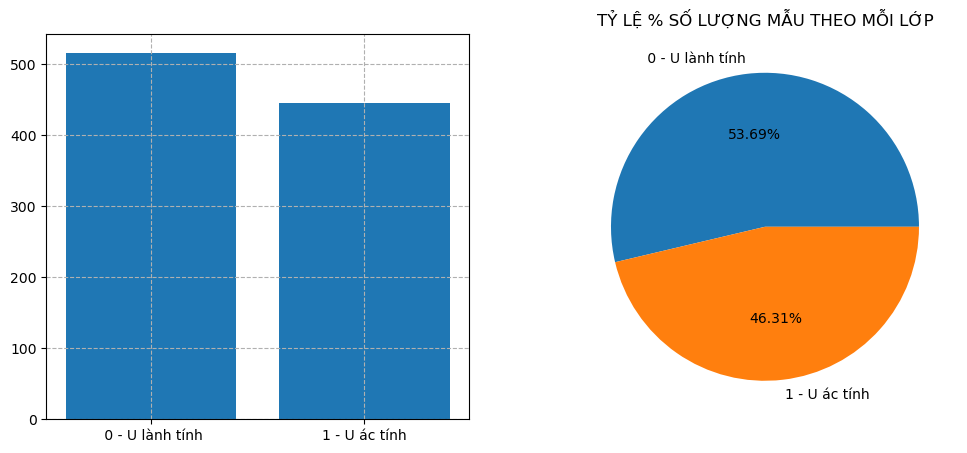

In [63]:
#Kiểm tra cân bằng dữ liệu
x = df_uvu['Target'].value_counts()
print(x)

#Trực quan hóa dữ liệu:
label=[' 0 - U lành tính', '1 - U ác tính']

fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(label,x.values)
plt.grid(ls='--')

plt.subplot(1,2,2)
plt.title('TỶ LỆ % SỐ LƯỢNG MẪU THEO MỖI LỚP')
plt.pie(x, labels=label,autopct='%.2f%%')
plt.grid(True)
plt.show()

## 2. Phân tách đầu vào (X) và nhãn (y)
---

In [64]:
df_uvu.columns

Index(['Age', 'Shape', 'Margin', 'Density', 'Target'], dtype='object')

In [65]:
#Tách dữ liệu biến độc lập
X_uvu = df_uvu.loc[:,['Age', 'Shape', 'Margin', 'Density']]
X_uvu

,Age,Shape,Margin,Density
0,3,3,3,0
1,1,1,2,0
2,3,0,2,0
3,0,1,0,0
4,4,1,2,0
...,...,...,...,...
956,2,2,0,0
957,2,0,2,0
958,3,0,1,0
959,3,0,2,0


In [66]:
#Tách dữ liệu biến phụ thuộc
y_uvu = df_uvu.loc[:,['Target']]
y_uvu

,Target
0,1
1,1
2,1
3,0
4,1
...,...
956,0
957,1
958,0
959,1


## 3. Tách tập dữ liệu ra tập Training - Test: 
---
* Training: dùng để huấn luyện mô hình (75%)
* Test: dùng để kiểm thử mô hình (25%)

In [67]:
#Gọi hàm tách dữ liệu trong thư viện sklearn:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_uvu,
                                                   y_uvu,
                                                    train_size=0.75,
                                                   shuffle=True,
                                                   random_state=18)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))
X_train

1. Kích thước tập Training: 720
2. Kích thước tập Test    : 241


,Age,Shape,Margin,Density
824,1,0,2,3
544,3,0,2,0
139,3,3,3,0
248,1,2,0,0
714,2,0,1,0
...,...,...,...,...
702,2,1,0,0
837,3,0,2,1
120,2,0,2,0
275,4,3,0,0


## 4. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn

In [68]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier

#Khai báo model KNN sử dụng các tham số mặc định
KNN_uvu = KNeighborsClassifier(n_neighbors=5)

#Hiển thị danh sách tham số:
KNN_uvu.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## 5. Huấn luyện mô hình
---

In [69]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_uvu.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
acc_train = KNN_uvu.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 99.58


## 6. Đánh giá độ chính xác của mô hình trên tập Test
---

In [71]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN_uvu.predict(X_test)
print(y_pred)

[1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0]


In [72]:
#Sử dụng module accuracy_score trong thư viện sklearn để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test
acc1 = accuracy_score(y_test, y_pred,normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc1, ' /', len(y_test))
print('Tổng số mẫu dự đoán sai:', len(y_test) - acc1, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 238  / 241
Tổng số mẫu dự đoán sai: 3  / 241


In [73]:
#2.Độ chính xác theo tỷ lệ % số mẫu dự đoán đúng/tổng số mẫu của tập test (Accuracy)
acc2 = accuracy_score(y_test, y_pred, normalize=True)
print('Độ chính xác của mô hình (k=5 default):', acc2)
print('Độ chính xác theo %:', round(acc2*100,2))

Độ chính xác của mô hình (k=5 default): 0.9875518672199171
Độ chính xác theo %: 98.76


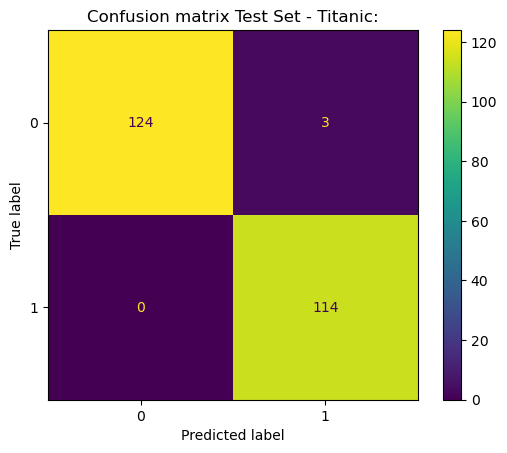

In [74]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set - Titanic:')
plt.show()

### Bot Test 2
---

In [75]:
KNN_uvu2 = KNeighborsClassifier(n_neighbors=18,
                                   weights='distance',
                                    algorithm='brute',
                                   p=1)

#Các tham số mới của Model:
KNN_uvu2.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 1,
 'weights': 'distance'}

In [76]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_uvu2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=18, p=1, weights='distance')

In [77]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_uvu2.score(X_train,y_train)
print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 100.0


In [78]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred2 = KNN_uvu2.predict(X_test)

In [79]:
#1.Đếm số mẫu dự đoán đúng:
acc21 = accuracy_score(y_test, y_pred2, normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc21, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 241  / 241


In [80]:
#2.Tính độ chính xác %:
acc22 = accuracy_score(y_test, y_pred2)
print('Độ chính xác của mô hình(k=11, weights=distance):', acc22)
print('Độ chính xác theo %:', round(acc22*100,2))

Độ chính xác của mô hình(k=11, weights=distance): 1.0
Độ chính xác theo %: 100.0


Confusion matrix - Titanic:
[[127   0]
 [  0 114]]


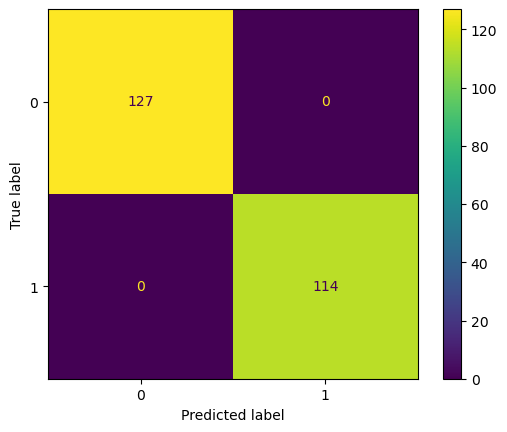

In [81]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cnf_matrix_titanic = confusion_matrix(y_test,y_pred2)
print('Confusion matrix - Titanic:')
print(cnf_matrix_titanic)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()